<a href="https://colab.research.google.com/github/aghnisyaa/bioactivity_project/blob/main/real_CDD_ML_Part_5_dengue_virus_Compare_Regressors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of dengue virus inhibitors.

In tutorial, LazyRegressor is being used, but I am going to use Scikit-Learn.



## **1. Import libraries**

In [38]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For splitting the dataset
from sklearn.model_selection import train_test_split

# For building the linear regression model
from sklearn.linear_model import LinearRegression

# For evaluating performance
from sklearn.metrics import mean_squared_error, r2_score

# For cross-validation (optional, for performance reliability)
from sklearn.model_selection import cross_val_score


## **2. Load the data set**


In [39]:
! wget https://raw.githubusercontent.com/aghnisyaa/bioactivity_project/refs/heads/main/dengue_virus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-11-30 07:26:31--  https://raw.githubusercontent.com/aghnisyaa/bioactivity_project/refs/heads/main/dengue_virus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134149 (131K) [text/plain]
Saving to: ‘dengue_virus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.3’

dengue_virus_06_bio 100%[===================>] 131.00K  --.-KB/s    in 0.03s   

2024-11-30 07:26:31 (4.94 MB/s) - ‘dengue_virus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv.3’ saved [134149/134149]



In [40]:
df = pd.read_csv('dengue_virus_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [41]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [42]:
# Define features (X) and target (Y)
X = df.drop('pIC50', axis=1)  #'pIC50' is the target
Y = df['pIC50']

# Check for missing values
print(X.isnull().sum())
print(Y.isnull().sum())

# Drop rows with missing values (optional based on your dataset)
df = df.dropna()
X = df.drop('pIC50', axis=1)
Y = df['pIC50']


PubchemFP0      0
PubchemFP1      0
PubchemFP2      0
PubchemFP3      0
PubchemFP4      0
               ..
PubchemFP876    0
PubchemFP877    0
PubchemFP878    0
PubchemFP879    0
PubchemFP880    0
Length: 881, dtype: int64
0


*Feature Selection (Optional)

In [43]:
# Remove low variance features (optional)
from sklearn.feature_selection import VarianceThreshold

selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))
X = selection.fit_transform(X)



## **5. Split the Data into Training and Test Sets**

Split the data into training and testing sets (80/20 split or any other ratio).

In [44]:
# Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check the dimensions of the training and test sets
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)


(55, 230) (14, 230) (55,) (14,)


## **6. Train the Linear Regression Model**

train a Linear Regression model using scikit-learn.

In [45]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, Y_train)


LinearRegression()

## **7. Make Predictions**

In [47]:
# Make predictions on the test set
Y_pred = model.predict(X_test)


#**8. Evaluate the Model**

Now, evaluate the model using R² and Mean Squared Error (MSE).

In [48]:
# Evaluate the model
r2 = r2_score(Y_test, Y_pred)  # R² score
mse = mean_squared_error(Y_test, Y_pred)  # Mean Squared Error

# Print the results
print(f'R²: {r2}')
print(f'Mean Squared Error: {mse}')


R²: -1.1340921674421955
Mean Squared Error: 1.770916153449108


#**9. Visualize the Model's Performance**

**Scatter Plot: Predicted vs Actual Values**

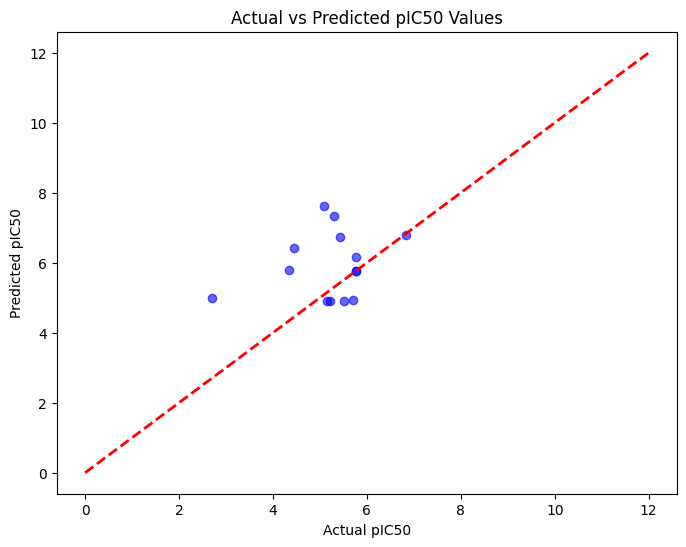

In [49]:
# Scatter plot for predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.6, color='blue')
plt.plot([0, 12], [0, 12], '--r', lw=2)  # Line for perfect predictions
plt.xlabel('Actual pIC50')
plt.ylabel('Predicted pIC50')
plt.title('Actual vs Predicted pIC50 Values')
plt.show()


**Residual Plot**

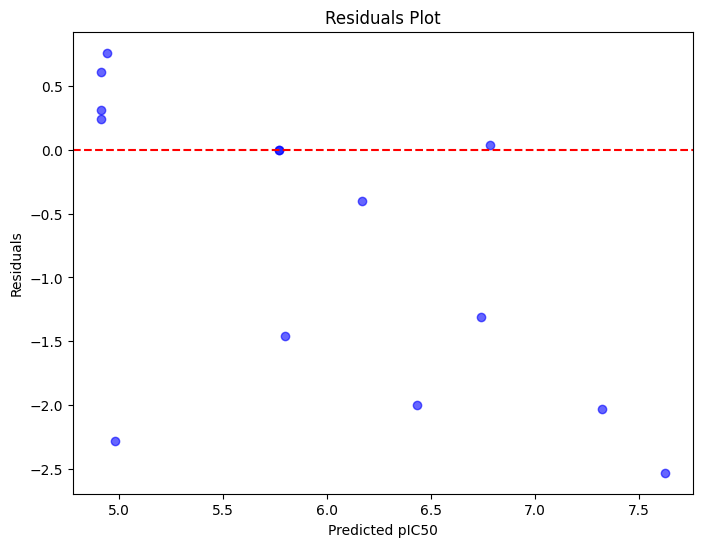

In [51]:
# Residual plot (the difference between actual and predicted values)
residuals = Y_test - Y_pred
plt.figure(figsize=(8, 6))
plt.scatter(Y_pred, residuals, alpha=0.6, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted pIC50')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


#**10. Cross-Validation (Optional)**

**For better model evaluation, use cross-validation to estimate the model's performance more robustly.**

In [52]:
# Cross-validation (optional)
cv_scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')

# Print average MSE from cross-validation
print(f'Average MSE from cross-validation: {-cv_scores.mean()}')


Average MSE from cross-validation: 3.0874715618416766


#**11. Model Saving (Optional)**
If you are satisfied with the model and would like to save it for future use, you can serialize the trained model using joblib or pickle.

In [53]:
import joblib

# Save the model
joblib.dump(model, 'linear_regression_model.pkl')

# Load the saved model (if you want to load it in the future)
loaded_model = joblib.load('linear_regression_model.pkl')
